# Predicting whether the song will be hit or a flop

## 1.importing libararies


In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score ,confusion_matrix

## 2. importing datasets


Starting from Jan 1st, 2010, ending at Dec 31st, 2019.

In [4]:
df = pd.read_csv("datasets/dataset-of-10s.csv")
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10.0,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9.0,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,NaN,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9.0,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7.0,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8.0,1


## 3. preprocessing


### 3.1 handling missing values

In [5]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            5
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               4
duration_ms         0
time_signature      0
chorus_hit          0
sections            2
target              0
dtype: int64

In [6]:
df.dropna(subset=['tempo','loudness','sections'],axis=0 ,inplace=True)

In [7]:
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections            float64
target                int64
dtype: object

### 3.2 Feature Selection

In [12]:
df.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [13]:
X= df.iloc[:,0:-1]
y = df.iloc[:,[-1]] 

### 3.3 normalisation


In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X)

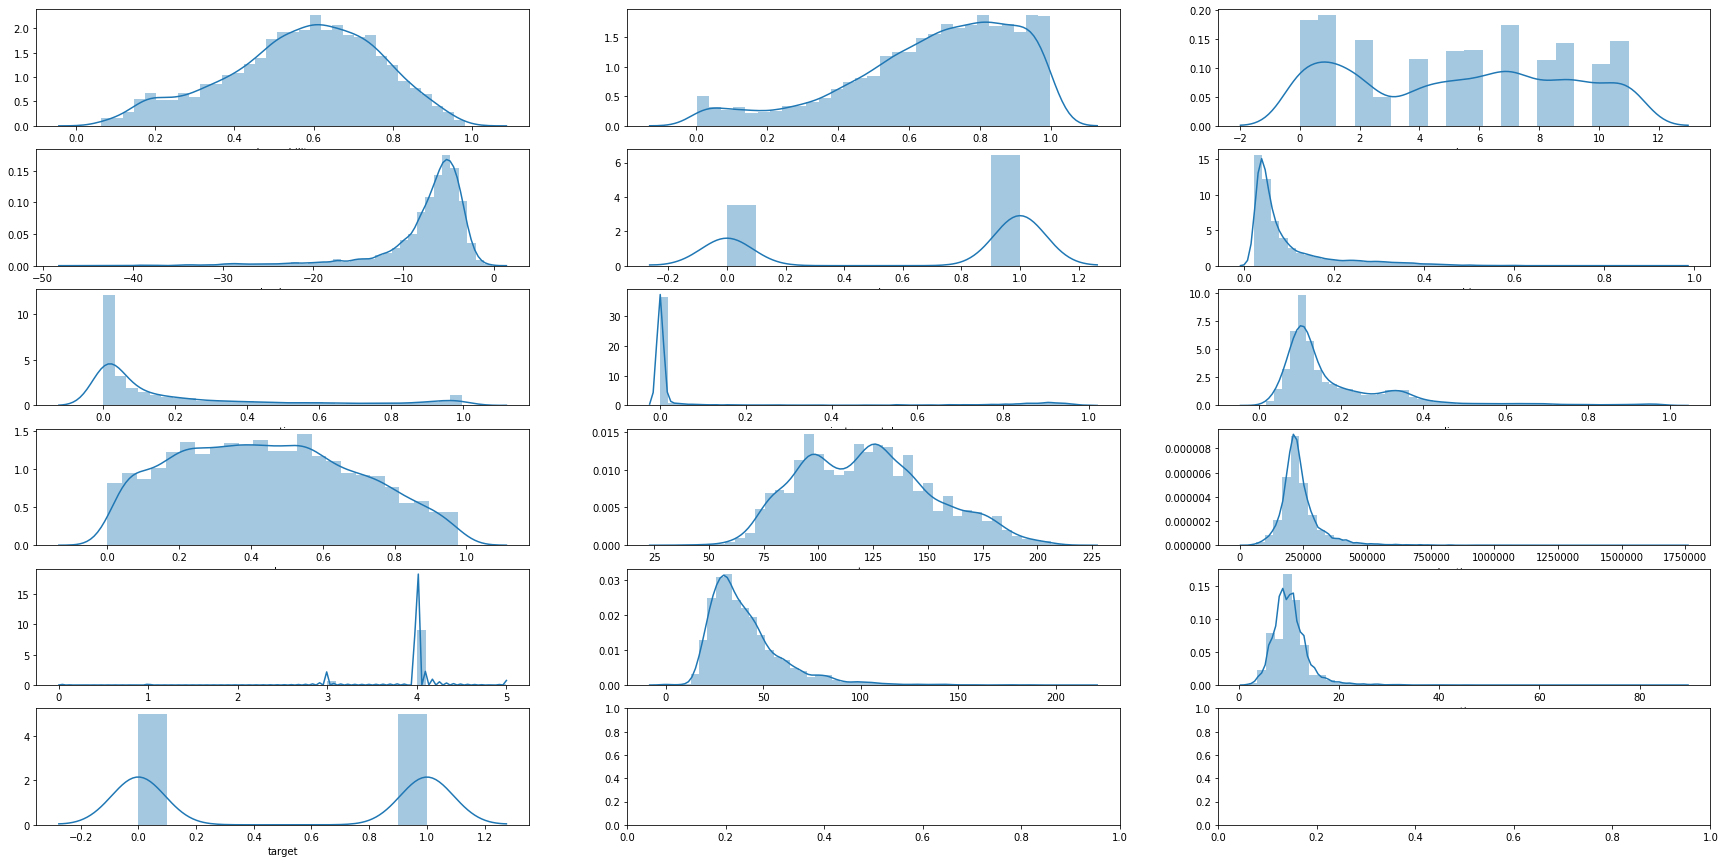

In [30]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=6
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols ,figsize=(30,15))
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])

## 4. splitting data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5109, 15) (5109, 1)
Test set: (1278, 15) (1278, 1)


## 5. logistic regression

C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.
This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

oh should carefully match the <b>solver</b> and regularization method for several reasons:
'liblinear' solver doesn’t work without regularization.
'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
'saga' is the only solver that supports elastic-net regularization.

In [13]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
yhat = LR.predict(X_test)
yhat


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.39079598, 0.60920402],
       [0.20100786, 0.79899214],
       [0.31419351, 0.68580649],
       ...,
       [0.51186024, 0.48813976],
       [0.22171634, 0.77828366],
       [0.13226905, 0.86773095]])

evaluation

In [44]:
p_score = precision_score(y_test, yhat)
r_score = recall_score(y_test, yhat)
f1 = f1_score(y_test, yhat)
ac=accuracy_score(y_test,yhat)
cfmatrix = confusion_matrix(y_test, yhat)
print("confusion matrix : \n "+ str(cfmatrix ))
print("precision: "+ str(p_score))
print("recall:    "+str(r_score))
print("f-score:   " + str(f1))
print("accuracy   " + str(ac))


confusion matrix : 
 [[410 213]
 [ 56 599]]
precision: 0.7376847290640394
recall:    0.9145038167938931
f-score:   0.8166325835037491
accuracy   0.7895148669796557


## 6. kNN


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ks=10
mean_acc=[]
for k in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train,y_train.values.ravel())
    yhat=neigh.predict(X_test)
    mean_acc.append(accuracy_score(yhat,y_test))
mean_acc

[0.7574334898278561,
 0.7347417840375586,
 0.7777777777777778,
 0.7550860719874805,
 0.7683881064162754,
 0.7676056338028169,
 0.7769953051643192,
 0.7746478873239436,
 0.7895148669796557]

In [46]:
max_acc=max(mean_acc)
print("the best value of k is")
mean_acc.index(max_acc)

the best value of k is


8

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

p_score = precision_score(yhat,y_test)
r_score = recall_score(yhat,y_test)
f1 = f1_score(yhat,y_test)
cfmatrix = confusion_matrix(yhat,y_test)
ac=accuracy_score(yhat,y_test)
print("confusion matrix : \n "+ str(cfmatrix ))
print("precision: "+ str(p_score))
print("recall:    "+str(r_score))
print("f-score:   " + str(f1))
print("accuracy   " + str(ac))


confusion matrix : 
 [[396  42]
 [227 613]]
precision: 0.9358778625954198
recall:    0.7297619047619047
f-score:   0.820066889632107
accuracy   0.7895148669796557


## 7. SVM

In [48]:
from sklearn import svm
loan_svm = svm.SVC(kernel='rbf')
loan_svm.fit(X_train, y_train.values.ravel()) 

C:\Users\Swarrangi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
yhat3 = loan_svm.predict(X_test)

In [50]:
accuracy_score(yhat3,y_test)

0.8145539906103286

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

p_score = precision_score(yhat3,y_test)
r_score = recall_score(yhat3,y_test)
f1 = f1_score(yhat3,y_test)
cfmatrix = confusion_matrix(yhat3,y_test)
ac=accuracy_score(yhat3,y_test)
print("confusion matrix : \n "+ str(cfmatrix ))
print("precision: "+ str(p_score))
print("recall:    "+str(r_score))
print("f-score:   " + str(f1))
print("accuracy   " + str(ac))

confusion matrix : 
 [[436  50]
 [187 605]]
precision: 0.9236641221374046
recall:    0.7638888888888888
f-score:   0.8362128541810642
accuracy   0.8145539906103286


## 8. RANDOM FOREST 

Training the Algorithm

In [52]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

Evaluating the algorithm

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

p_score = precision_score(y_test, y_pred)
r_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cfmatrix = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)
print("confusion matrix : \n "+ str(cfmatrix ))
print("precision: "+ str(p_score))
print("recall:    "+str(r_score))
print("f-score:   " + str(f1))
print("accuracy   " + str(ac))

confusion matrix : 
 [[498 125]
 [ 71 584]]
precision: 0.8236953455571228
recall:    0.8916030534351145
f-score:   0.8563049853372434
accuracy   0.8466353677621283
